<a href="https://colab.research.google.com/github/als1379/Statistical-and-Mathematical-Methods-for-Artificial-Intelligence/blob/main/HW3/HW3_Optimization_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GD algorithm with fixed step size

In [72]:
def gradient_descent(f, grad_f, x0, alpha, max_iter=100, tolf=1e-5, tolx=1e-5):
    x = x0
    x0_gnorm = np.linalg.norm(grad_f(x0))
    history = {
        'x': [x.copy()],
        'f(X)': [f(x)],
        'grad_norm': []
    }

    for k in range(max_iter):
        g = grad_f(x)
        gnorm = np.linalg.norm(g)
        history['grad_norm'].append(gnorm)
        # Update
        x = x - alpha * g

        if gnorm < tolf * x0_gnorm:
            history['x'].append(x.copy())
            history['f(X)'].append(f(x))

            print('Gradient norm below threshold. tolf')
            break

        if np.linalg.norm(x - x0) < tolx:
            history['x'].append(x.copy())
            history['f(X)'].append(f(x))

            print('Gradient norm below threshold. tolx')
            break

        history['x'].append(x.copy())
        history['f(X)'].append(f(x))

    return x, history


## GD algorithm with backtracking

In [73]:
import numpy as np

def backtracking(f, grad_f, x, alpha=1, c=0.8, tau=0.25):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.

    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
    return alpha

In [51]:
def gradient_descent_with_backtracking(f, grad_f, x0, max_iter=100, tolf=1e-5, tolx=1e-5):
    x = x0
    x0_gnorm = np.linalg.norm(grad_f(x0))
    history = {
        'x': [x.copy()],
        'f(X)': [f(x)],
        'grad_norm': [],
        'alpha': []
    }

    for k in range(max_iter):
        g = grad_f(x)
        gnorm = np.linalg.norm(g)
        history['grad_norm'].append(gnorm)
        alpha = backtracking(f, grad_f, x)
        # Update
        x = x - alpha * g
        history['alpha'].append(alpha)
        if gnorm < tolf * x0_gnorm:
            history['x'].append(x.copy())
            history['f(X)'].append(f(x))
            print('Gradient norm below threshold. tolf')

            break

        if np.linalg.norm(x - x0) < tolx:
            history['x'].append(x.copy())
            history['f(X)'].append(f(x))
            print('Gradient norm below threshold. tolx')

            break


        history['x'].append(x.copy())
        history['f(X)'].append(f(x))

    return x, history

# Test Functions

$f(x_1, x_2) = (x_1 - 3)^2 + (x_2 - 1)^2$

In [34]:
def f1(x):
    # x is [x1, x2]
    return (x[0] - 3)**2 + (x[1] - 1)**2

def grad_f1(x):
    # gradient with respect to x1, x2
    return np.array([
        2*(x[0] - 3),
        2*(x[1] - 1)
    ])

x_star_f1 = np.array([3, 1])

$f(x_1, x_2) = 10(x_1 − 1)^2 + (x_2 − 2)^2,$

In [35]:
def f2(x):
    return 10*(x[0] - 1)**2 + (x[1] - 2)**2

def grad_f2(x):
    return np.array([
        20*(x[0] - 1),
        2*(x[1] - 2)
    ])

x_star_f2 = np.array([1, 2])

$f(x) = \frac{1}{2}|| Ax - b ||_2^2,$

In [22]:
def f3(x, A, b):
    # f(x) = 1/2 || A x - b ||^2
    r = A.dot(x) - b
    return 0.5 * np.dot(r, r)

def grad_f3(x, A, b):
    # ∇f(x) = A^T (A x - b)
    return A.T.dot(A.dot(x) - b)


$f(x) = \frac{1}{2} || Ax - b ||_2^2 + \frac{\lambda}{2} ||x||_2^2,$

In [23]:
def f4(x, A, b, lam):
    # 1/2 ||A x - b||^2 + lam/2 ||x||^2
    r = A.dot(x) - b
    return 0.5*np.dot(r, r) + 0.5*lam*np.dot(x, x)

def grad_f4(x, A, b, lam):
    # A^T(A x - b) + lam x
    return A.T.dot(A.dot(x) - b) + lam*x


$f(x) = x^4 + x^3 - 2x^2 - 2x.$

In [60]:
def f5(x):
    # If x is just a float:
    return x[0]**4 + x[0]**3 - 2*x[0]**2 - 2*x[0]

def grad_f5(x):
    # derivative wrt x:
    return np.array([4*x[0]**3 + 3*x[0]**2 - 4*x[0] - 2])


# Apply GD and SGD on functions

## Test F1, F2

In [74]:
test_functions = [f1, f2]
grad_functions = [grad_f1, grad_f2]
x_stars = [x_star_f1, x_star_f2]
# 1) Choose initial guess, step size, etc.
x0 = np.array([0.0, 0.0])
alpha_values = [0.1, 0.05, 0.01]

histories = [{}, {}]

for i in range(2):
    x_sol_b, hist_b = gradient_descent_with_backtracking(test_functions[i], grad_functions[i], x0)
    error_list_b = []
    for xk in hist_b['x']:
        err = np.linalg.norm(xk - x_stars[i])
        error_list_b.append(err)

    for alpha in alpha_values:
        x_sol, hist = gradient_descent(test_functions[i], grad_functions[i], x0, alpha)

        # Compute the "error vs iteration" as well
        error_list = []
        for xk in hist['x']:
            err = np.linalg.norm(xk - x_stars[i])
            error_list.append(err)

        # Save everything
        histories[i][alpha] = {
            'x_sol': x_sol,
            'grad_norm': hist['grad_norm'],
            'error': error_list,
            'f(x)': hist['f(X)']
        }
    histories[i]['backtracking'] = {
        'x_sol': x_sol_b,
        'grad_norm': hist_b['grad_norm'],
        'error': error_list_b,
        'f(x)': hist_b['f(X)'],
        'alpha': hist_b['alpha']
    }


Gradient norm below threshold. tolf
Gradient norm below threshold. tolf
Gradient norm below threshold. tolf
Gradient norm below threshold. tolf


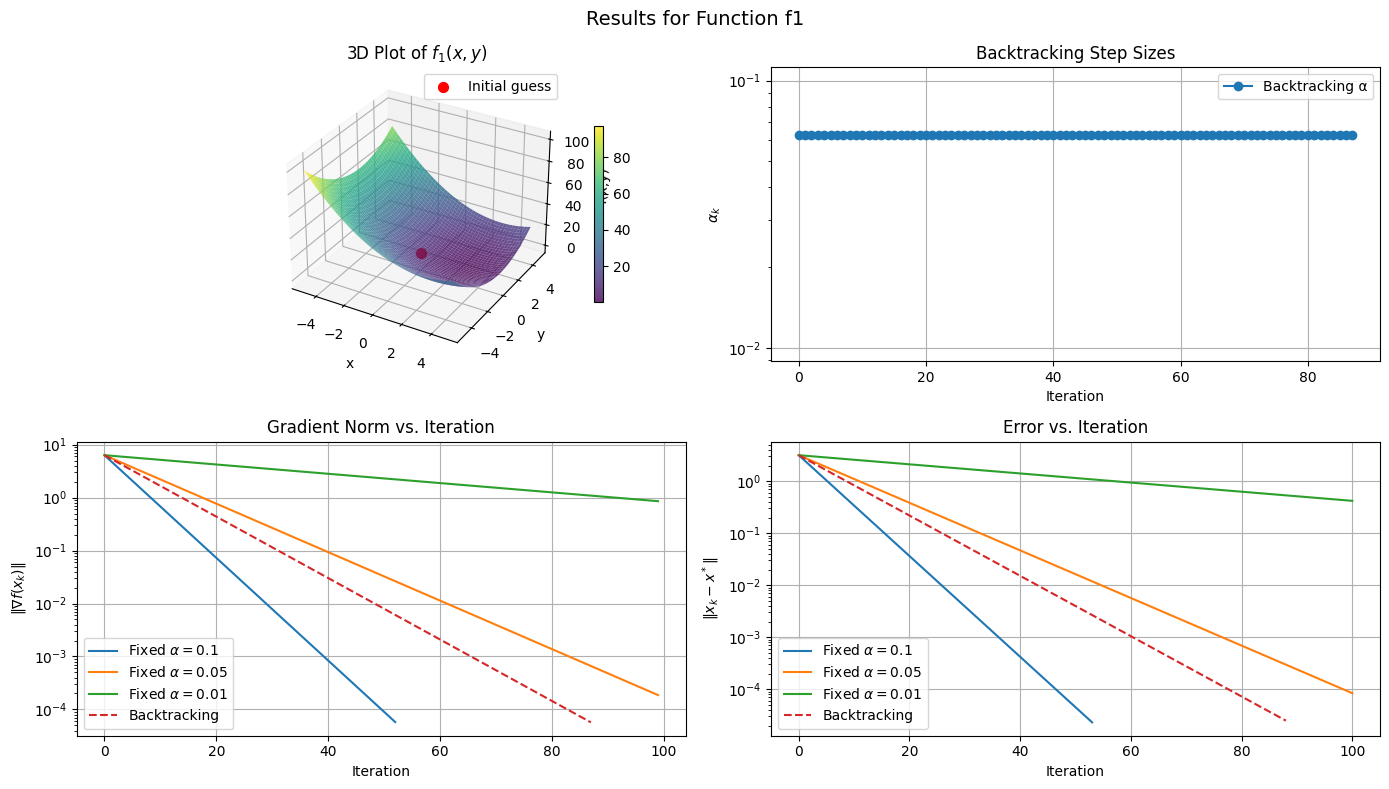

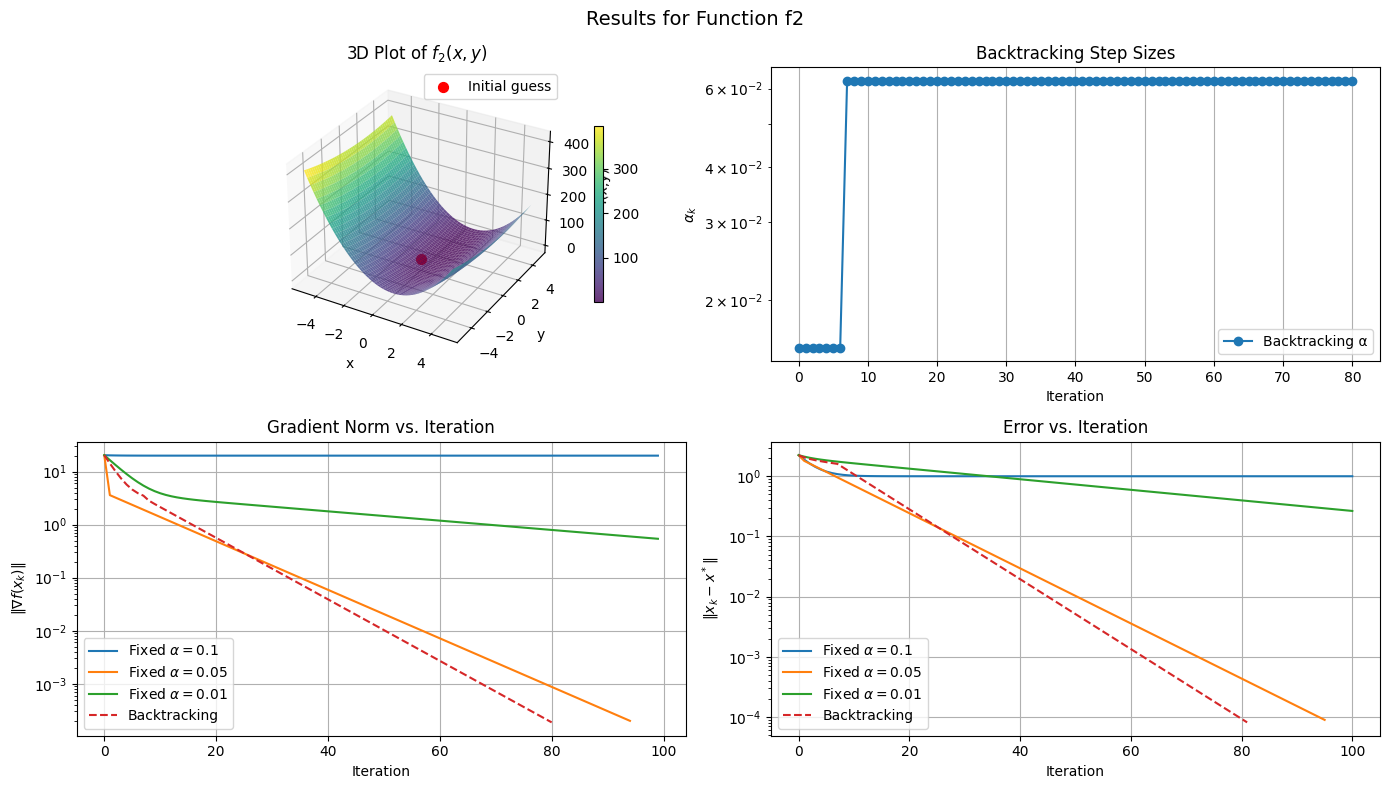

In [38]:
from mpl_toolkits.mplot3d import Axes3D


for i in range(2):
    x_min, x_max = -5, 5
    y_min, y_max = -5, 5
    num_points = 50

    x_vals = np.linspace(x_min, x_max, num_points)
    y_vals = np.linspace(y_min, y_max, num_points)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Evaluate f_i on the grid
    Z = test_functions[i]([X, Y])

    # Initial guess
    x0 = (0.0, 0.0)
    f0 = test_functions[i]([x0[0], x0[1]])

    # Retrieve backtracking alpha and logs
    alpha_bt = histories[i]['backtracking']['alpha']
    grad_bt  = histories[i]['backtracking']['grad_norm']
    error_bt = histories[i]['backtracking']['error']

    # ----------------------
    # 2) CREATE FIGURE + 4 SUBPLOTS
    # ----------------------
    fig = plt.figure(figsize=(14, 8))  # wide figure

    # Top-left: 3D surface
    ax_3d = fig.add_subplot(2, 2, 1, projection='3d')
    # Top-right: alpha vs. iteration (backtracking)
    ax_alpha = fig.add_subplot(2, 2, 2)
    # Bottom-left: gradient norm
    ax_grad = fig.add_subplot(2, 2, 3)
    # Bottom-right: error
    ax_err = fig.add_subplot(2, 2, 4)

    # ----------------------
    # 3) SUBPLOT: 3D Surface
    # ----------------------
    surf = ax_3d.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')
    ax_3d.scatter(x0[0], x0[1], f0, color='r', s=50, marker='o', label='Initial guess')
    ax_3d.set_title(rf'3D Plot of $f_{{{i+1}}}(x,y)$')
    ax_3d.set_xlabel('x')
    ax_3d.set_ylabel('y')
    ax_3d.set_zlabel('f(x,y)')
    ax_3d.view_init(elev=30, azim=-60)
    ax_3d.legend(loc='best')
    fig.colorbar(surf, ax=ax_3d, shrink=0.6)  # optional colorbar

    # ----------------------
    # 4) SUBPLOT: alpha in Backtracking
    # ----------------------
    ax_alpha.plot(alpha_bt, marker='o', linestyle='-', label='Backtracking α')
    ax_alpha.set_yscale('log')
    ax_alpha.set_xlabel('Iteration')
    ax_alpha.set_ylabel(r'$\alpha_k$')
    ax_alpha.set_title('Backtracking Step Sizes')
    ax_alpha.grid(True)
    ax_alpha.legend()

    # ----------------------
    # 5) SUBPLOT: Gradient Norm vs. Iteration
    # ----------------------

    for alpha in alpha_values:
        grad_norms = histories[i][alpha]['grad_norm']
        ax_grad.plot(grad_norms, label=rf'Fixed $\alpha={alpha}$')
    ax_grad.plot(grad_bt, label='Backtracking', linestyle='--')
    ax_grad.set_yscale('log')
    ax_grad.set_xlabel('Iteration')
    ax_grad.set_ylabel(r'$\|\nabla f(x_k)\|$')
    ax_grad.set_title('Gradient Norm vs. Iteration')
    ax_grad.grid(True)
    ax_grad.legend()

    # ----------------------
    # 6) SUBPLOT: Error vs. Iteration
    # ----------------------
    for alpha in alpha_values:
        errors = histories[i][alpha]['error']
        ax_err.plot(errors, label=rf'Fixed $\alpha={alpha}$')
    ax_err.plot(error_bt, label='Backtracking', linestyle='--')
    ax_err.set_yscale('log')
    ax_err.set_xlabel('Iteration')
    ax_err.set_ylabel(r'$\|x_k - x^*\|$')
    ax_err.set_title('Error vs. Iteration')
    ax_err.grid(True)
    ax_err.legend()

    # ----------------------
    # 7) FINALIZE & SHOW
    # ----------------------
    fig.suptitle(f'Results for Function f{i+1}', fontsize=14)
    fig.tight_layout()
    plt.show()


## Test F3, F4

In [39]:
test_functions = [f3, f4]
grad_functions = [grad_f3, grad_f4]

def build_vandermonde_and_b(n):
    """
    Builds:
      A in R^(n x n) as a Vandermonde matrix with points in [0,1].
      b in R^n, computed by setting x^* = (1,1,...,1) and then b = A x^*.
    """
    # points in [0,1], e.g. n equally spaced
    v = np.linspace(0.0, 1.0, n)
    # Vandermonde matrix A
    A = np.vander(v, increasing=True)  # shape (n, n)

    # Let x^* = (1,1,...,1)^T
    x_star_true = np.ones(n)
    # b = A x^*
    b = A @ x_star_true
    return A, b, x_star_true

A, b, x_star_f3 = build_vandermonde_and_b(n)

# Choose lambda in (0,1), e.g. lam=0.5
lam = 0.5

x0 = np.zeros(n)

alpha_values = [0.1, 0.05, 0.01]

histories = [[{}, {}], [{}, {}], [{}, {}]]

x_star_f4 = np.linalg.solve(A.T@A + lam*np.eye(n), A.T@b)

# Now define "closures" so that each function takes only x as the argument
f3_closure = lambda x: f3(x, A, b)
grad_f3_closure = lambda x: grad_f3(x, A, b)

f4_closure = lambda x: f4(x, A, b, lam)
grad_f4_closure = lambda x: grad_f4(x, A, b, lam)

test_functions = [f3_closure, f4_closure]
grad_functions = [grad_f3_closure, grad_f4_closure]
x_stars = [x_star_f3, x_star_f4]

In [40]:
ns = [5, 10, 15]
for i_n in range(3):
    n = ns[i_n]
    # Loop over f3 (i=0) and f4 (i=1)
    for i in range(2):
        # 1) Run backtracking
        x_sol_b, hist_b = gradient_descent_with_backtracking(
                            test_functions[i], grad_functions[i], x0)

        # If you have a known x*, compute errors
        error_list_b = []
        if x_stars[i] is not None:
            for xk in hist_b['x']:
                err = np.linalg.norm(xk - x_stars[i])
                error_list_b.append(err)
        else:
            # or skip if unknown
            error_list_b = None

        # Store backtracking results
        histories[i_n][i]['backtracking'] = {
            'x_sol': x_sol_b,
            'grad_norm': hist_b['grad_norm'],
            'f(x)': hist_b['f(X)'],
            'alpha': hist_b['alpha'],
            'error': error_list_b
        }

        # 2) Run fixed step GD for each alpha
        for alpha in alpha_values:
            x_sol, hist = gradient_descent(test_functions[i], grad_functions[i],
                                          x0, alpha)

            # Compute the "error vs iteration" if x_star is known
            error_list = []
            if x_stars[i] is not None:
                for xk in hist['x']:
                    err = np.linalg.norm(xk - x_stars[i])
                    error_list.append(err)
            else:
                error_list = None

            # Store
            histories[i_n][i][alpha] = {
                'x_sol': x_sol,
                'grad_norm': hist['grad_norm'],
                'f(x)': hist['f(X)'],
                'error': error_list
            }


Gradient norm below threshold. tolf
Gradient norm below threshold. tolf
Gradient norm below threshold. tolf
Gradient norm below threshold. tolf
Gradient norm below threshold. tolf
Gradient norm below threshold. tolf


n=5


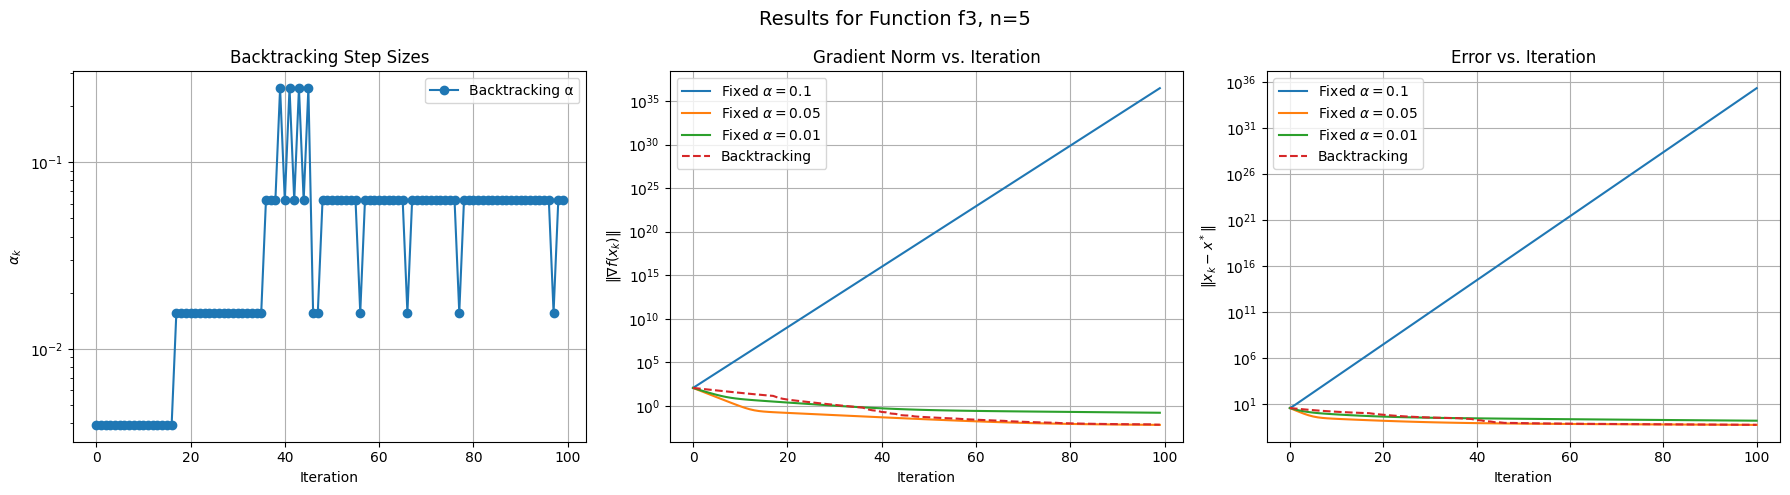

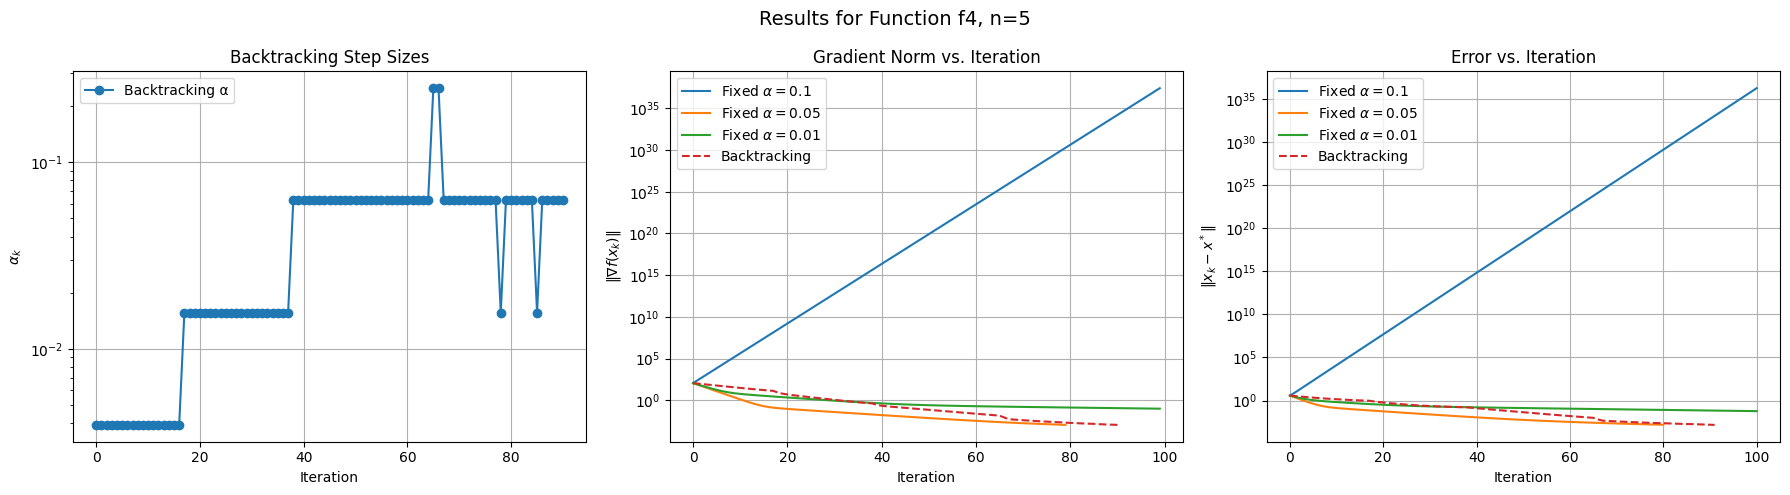

n=10


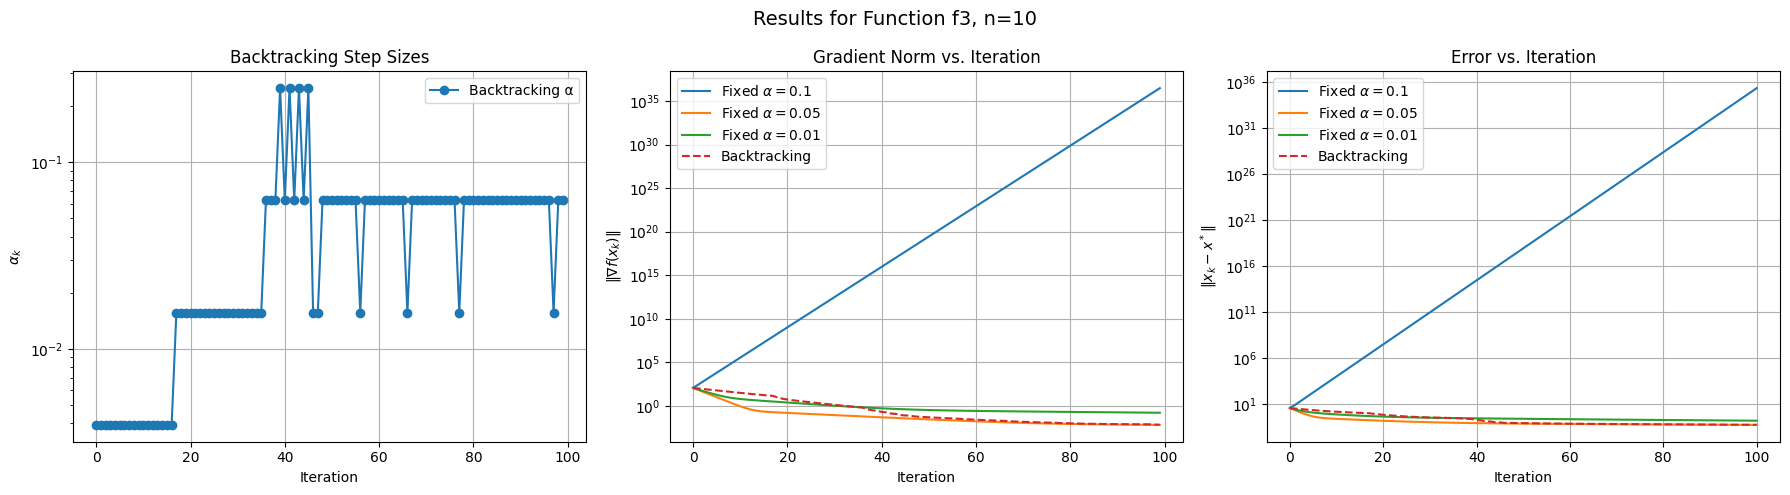

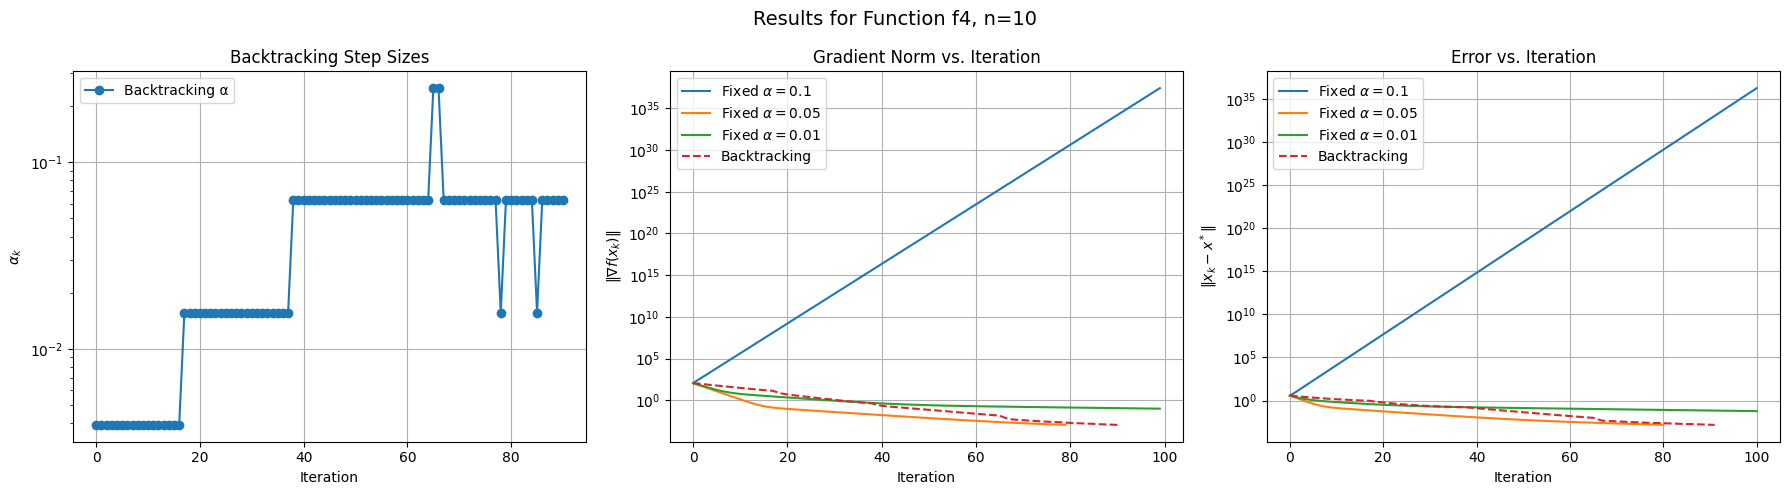

n=15


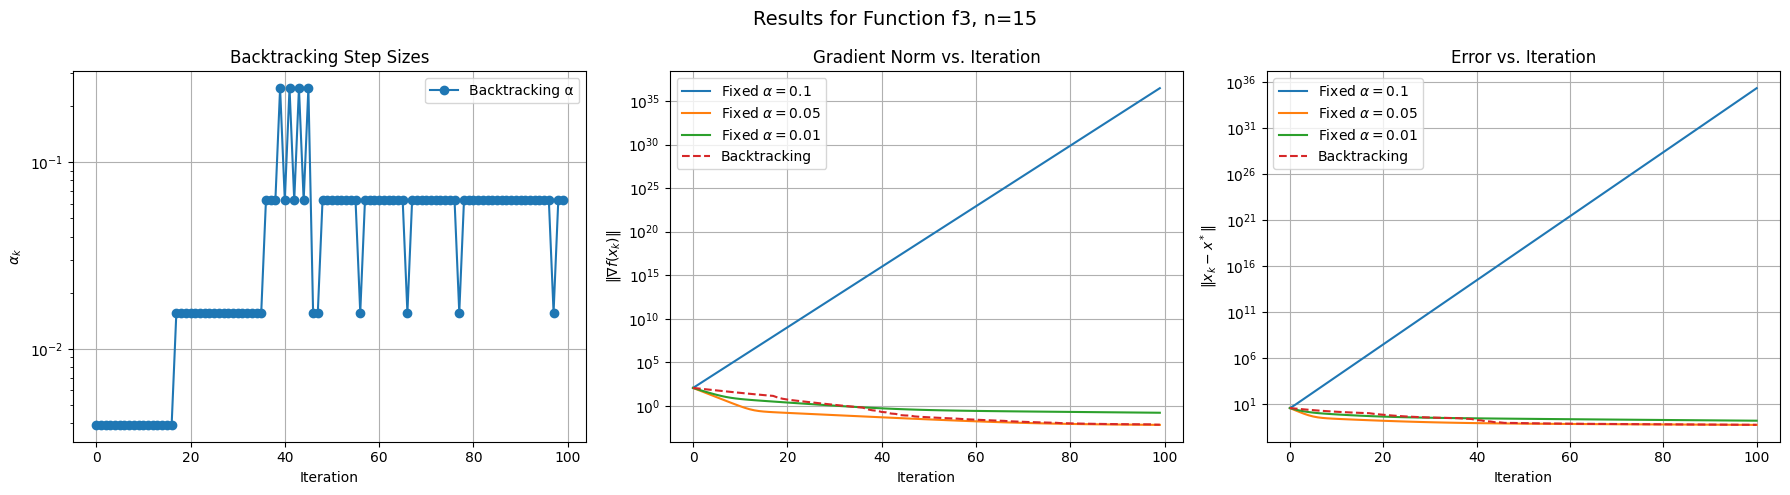

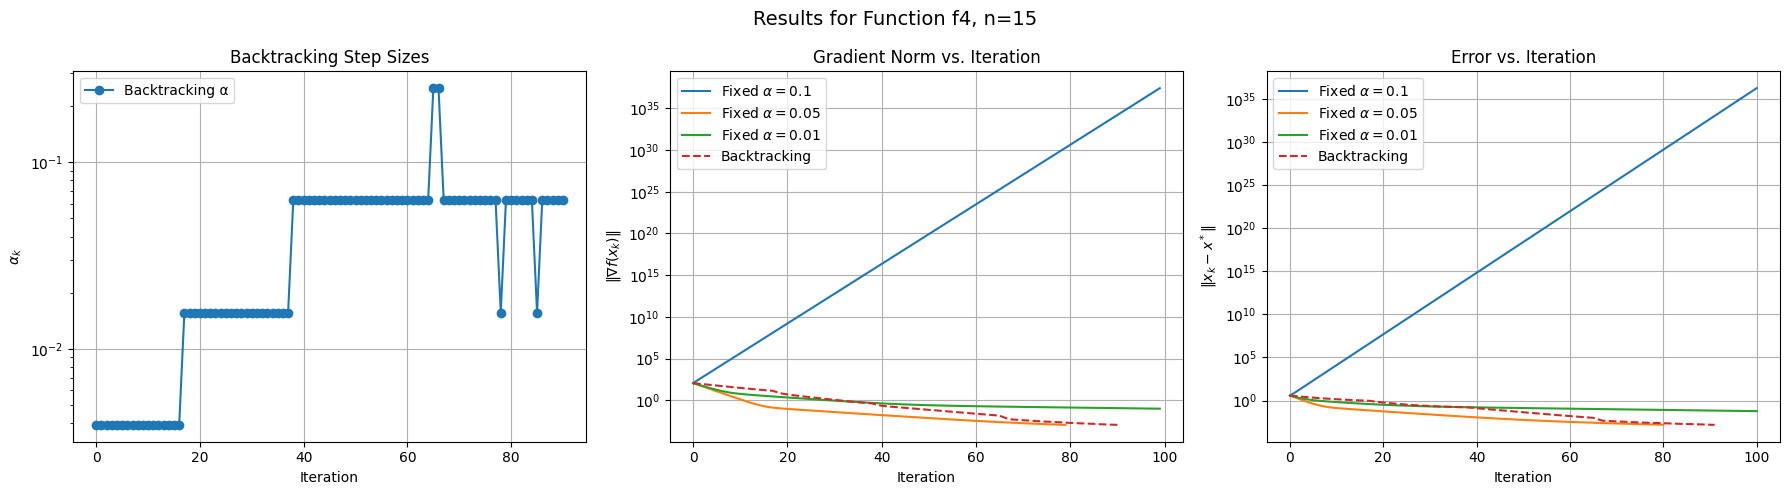

In [41]:
import matplotlib.pyplot as plt

for i_n in range(3):
    n = ns[i_n]
    print(f"n={n}")
    for i in range(2):
        # Retrieve backtracking alpha and logs
        alpha_bt = histories[i_n][i]['backtracking']['alpha']
        grad_bt  = histories[i_n][i]['backtracking']['grad_norm']
        error_bt = histories[i_n][i]['backtracking']['error']

        # Create a single row of 3 subplots
        fig = plt.figure(figsize=(18, 5))  # wide figure

        # Subplot 1: alpha vs iteration (backtracking)
        ax_alpha = fig.add_subplot(1, 3, 1)
        ax_alpha.plot(alpha_bt, marker='o', linestyle='-', label='Backtracking α')
        ax_alpha.set_yscale('log')
        ax_alpha.set_xlabel('Iteration')
        ax_alpha.set_ylabel(r'$\alpha_k$')
        ax_alpha.set_title('Backtracking Step Sizes')
        ax_alpha.grid(True)
        ax_alpha.legend()

        # Subplot 2: gradient norm vs iteration
        ax_grad = fig.add_subplot(1, 3, 2)
        for alpha in alpha_values:
            grad_norms = histories[i_n][i][alpha]['grad_norm']
            ax_grad.plot(grad_norms, label=rf'Fixed $\alpha={alpha}$')
        ax_grad.plot(grad_bt, label='Backtracking', linestyle='--')
        ax_grad.set_yscale('log')
        ax_grad.set_xlabel('Iteration')
        ax_grad.set_ylabel(r'$\|\nabla f(x_k)\|$')
        ax_grad.set_title('Gradient Norm vs. Iteration')
        ax_grad.grid(True)
        ax_grad.legend()

        # Subplot 3: error vs iteration
        ax_err = fig.add_subplot(1, 3, 3)
        for alpha in alpha_values:
            errors = histories[i_n][i][alpha]['error']
            ax_err.plot(errors, label=rf'Fixed $\alpha={alpha}$')
        ax_err.plot(error_bt, label='Backtracking', linestyle='--')
        ax_err.set_yscale('log')
        ax_err.set_xlabel('Iteration')
        ax_err.set_ylabel(r'$\|x_k - x^*\|$')
        ax_err.set_title('Error vs. Iteration')
        ax_err.grid(True)
        ax_err.legend()

        # Title for the entire figure
        fig.suptitle(f'Results for Function f{i+3}, n={ns[i_n]}', fontsize=14)

        # Improve spacing between subplots
        fig.tight_layout()
        plt.show()


## Test F5

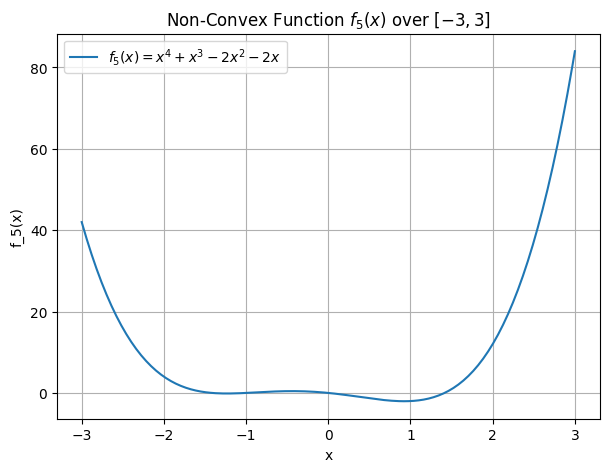

In [42]:
# Generate a grid of x-values in [-3, 3]
x_vals = np.linspace(-3, 3, 200)

# Evaluate f5(x) at each point
f_vals = [f5(x) for x in x_vals]

# Plot the function
plt.figure(figsize=(7,5))
plt.plot(x_vals, f_vals, label=r'$f_5(x) = x^4 + x^3 - 2x^2 - 2x$')
plt.title('Non-Convex Function $f_5(x)$ over $[-3,3]$')
plt.xlabel('x')
plt.ylabel('f_5(x)')
plt.grid(True)
plt.legend()
plt.show()


In [80]:

x0s = [-2.5, -1, 2]

alpha_values = [0.1, 0.05, 0.01]

histories = [{}, {}, {}]

x_stars = [x_star_f3, x_star_f4]

for i, x0 in enumerate(x0s):
    x_sol_b, hist_b = gradient_descent_with_backtracking(f5, grad_f5, np.array([x0]))
    print(f'backtracking x0={x0} the solution={x_sol_b}, f(x)={f5(x_sol_b)}')

    # Store backtracking results
    histories[i]['backtracking'] = {
        'x_sol': x_sol_b,
        'grad_norm': hist_b['grad_norm'],
        'f(x)': hist_b['f(X)'],
        'alpha': hist_b['alpha'],
    }

    # 2) Run fixed step GD for each alpha
    for alpha in alpha_values:
        x_sol, hist = gradient_descent(f5, grad_f5,
                                      np.array([x0]), alpha)
        print(f'fixed sized alpha={alpha} x0={x0} the solution={x_sol}, f(x)={f5(x_sol)}')

        # Store
        histories[i][alpha] = {
            'x_sol': x_sol,
            'grad_norm': hist['grad_norm'],
            'f(x)': hist['f(X)'],
        }
    print()

Gradient norm below threshold. tolf
backtracking x0=-2.5 the solution=[-1.23228394], f(x)=-0.13781766227257775
Gradient norm below threshold. tolf
fixed sized alpha=0.1 x0=-2.5 the solution=[0.92222998], f(x)=-2.0377480413379336
Gradient norm below threshold. tolf
fixed sized alpha=0.05 x0=-2.5 the solution=[-1.23221397], f(x)=-0.13781766673223128
fixed sized alpha=0.01 x0=-2.5 the solution=[-1.23251964], f(x)=-0.1378174012201483

Gradient norm below threshold. tolf
backtracking x0=-1 the solution=[-1.23223838], f(x)=-0.13781766897328307
Gradient norm below threshold. tolf
fixed sized alpha=0.1 x0=-1 the solution=[-1.23223934], f(x)=-0.13781766897826797
Gradient norm below threshold. tolf
fixed sized alpha=0.05 x0=-1 the solution=[-1.23223887], f(x)=-0.13781766897664305
fixed sized alpha=0.01 x0=-1 the solution=[-1.2319094], f(x)=-0.13781729686505306

Gradient norm below threshold. tolf
backtracking x0=2 the solution=[0.92224762], f(x)=-2.0377480384370203
Gradient norm below threshold.

with x0=2 better minimum than x0=-25, x0=-1

local minimum at x=-1.23223934
global minimum at x=0.92221481

x0=-2.5


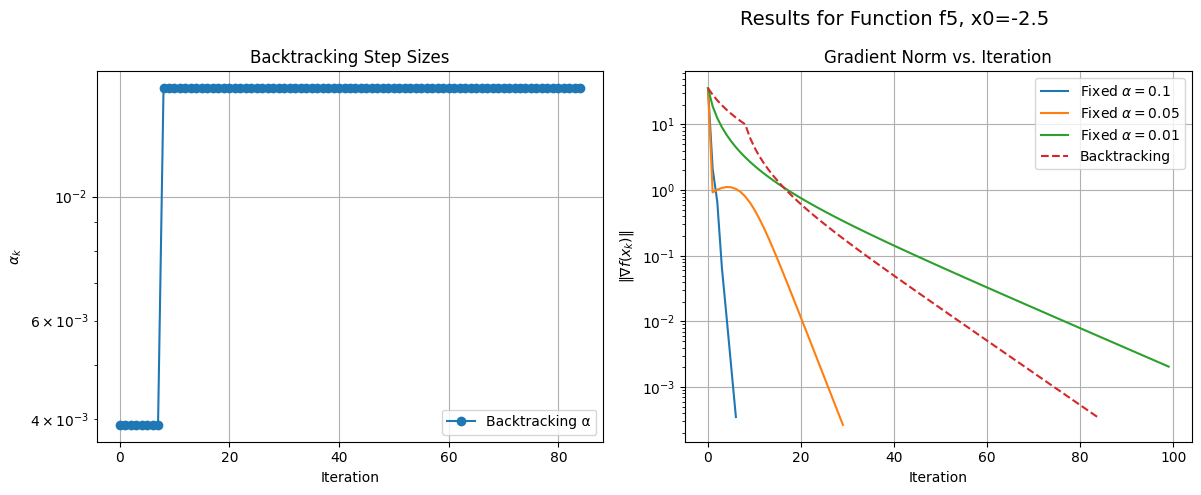

x0=-1


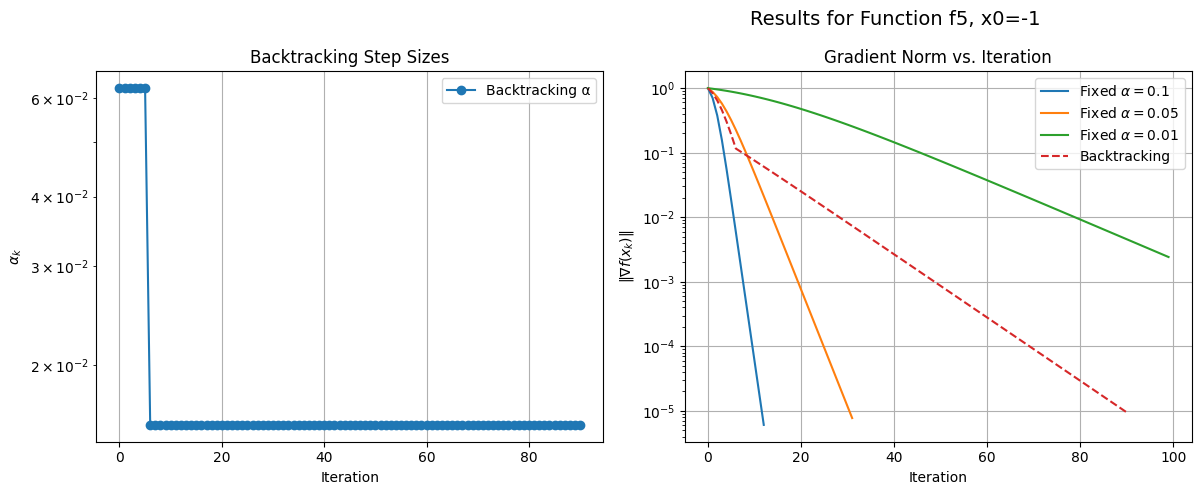

x0=2


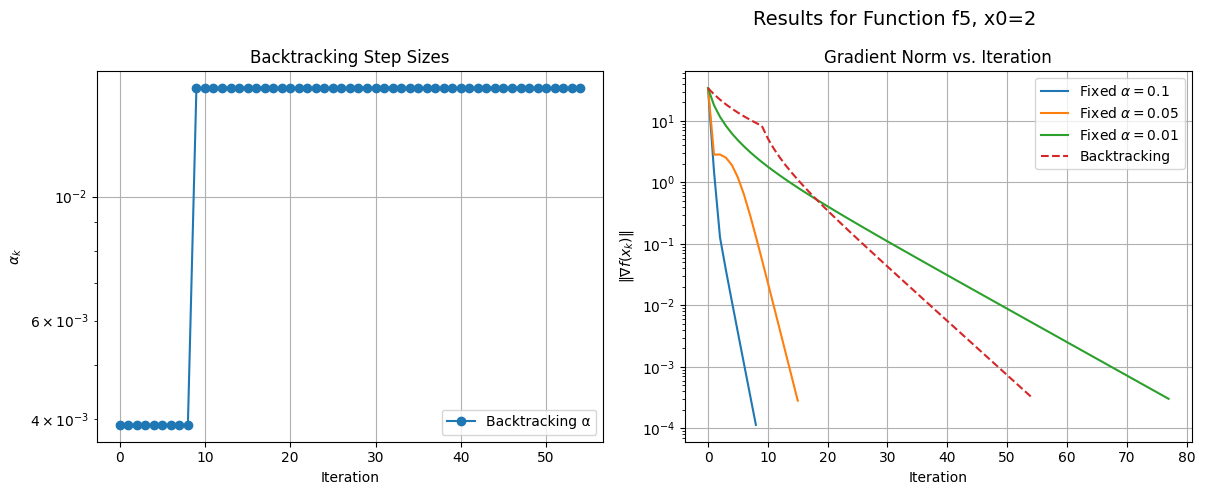

In [78]:
import matplotlib.pyplot as plt

for j in range(3):
    x0 = x0s[j]
    print(f"x0={x0}")
    # Retrieve backtracking alpha and logs
    alpha_bt = histories[j]['backtracking']['alpha']
    grad_bt  = histories[j]['backtracking']['grad_norm']

    # Create a single row of 3 subplots
    fig = plt.figure(figsize=(18, 5))  # wide figure

    # Subplot 1: alpha vs iteration (backtracking)
    ax_alpha = fig.add_subplot(1, 3, 1)
    ax_alpha.plot(alpha_bt, marker='o', linestyle='-', label='Backtracking α')
    ax_alpha.set_yscale('log')
    ax_alpha.set_xlabel('Iteration')
    ax_alpha.set_ylabel(r'$\alpha_k$')
    ax_alpha.set_title('Backtracking Step Sizes')
    ax_alpha.grid(True)
    ax_alpha.legend()

    # Subplot 2: gradient norm vs iteration
    ax_grad = fig.add_subplot(1, 3, 2)
    for alpha in alpha_values:
        grad_norms = histories[j][alpha]['grad_norm']
        ax_grad.plot(grad_norms, label=rf'Fixed $\alpha={alpha}$')
    ax_grad.plot(grad_bt, label='Backtracking', linestyle='--')
    ax_grad.set_yscale('log')
    ax_grad.set_xlabel('Iteration')
    ax_grad.set_ylabel(r'$\|\nabla f(x_k)\|$')
    ax_grad.set_title('Gradient Norm vs. Iteration')
    ax_grad.grid(True)
    ax_grad.legend()

    # Title for the entire figure
    fig.suptitle(f'Results for Function f5, x0={x0}', fontsize=14)

    # Improve spacing between subplots
    fig.tight_layout()
    plt.show()
